# Big Data Mart Sales Problem
Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.



In [2]:
#Importing important Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the Dataset with Pandas:
# Reading the csv file from dataset
Big_data = pd.read_csv('bigdatamart_Train.csv')

In [4]:
Big_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
#checking for null values
Big_data.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

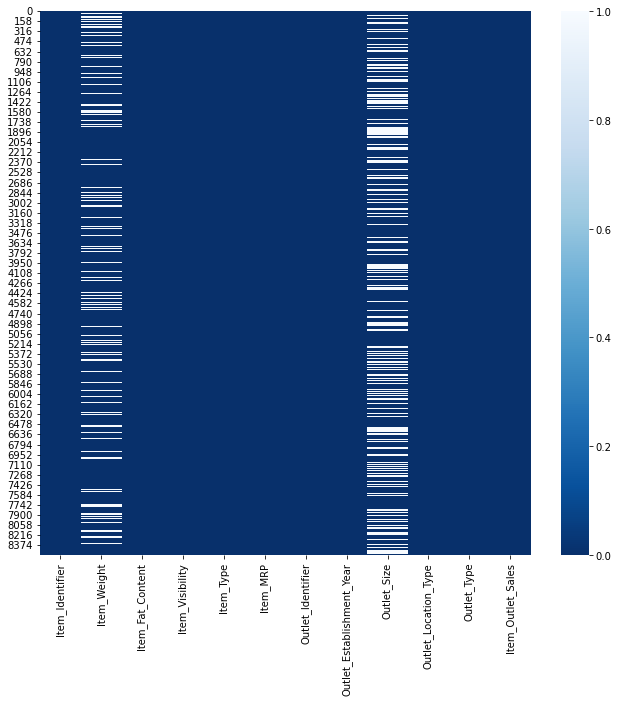

In [6]:
#Checking with the help of heatmap
plt.figure(figsize=(11,10))
sns.heatmap(Big_data.isna(), cmap='Blues_r')

THERE IS HUGE NO. OF NULL DATA IS PRESENT IN Item_Weight AND Outlet_Size

In [7]:
## Checking the dimension of the dataset
Big_data.shape

(8523, 12)

In [8]:
#column counts in the datset
Big_data.columns.value_counts().sum()

12

In [9]:
## loading  all  the  columns  names  here 
Big_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [10]:
#Getting the Unique values from the columns
Big_data.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# Getting the basic summary and statistical information of the data.

In [11]:


# To get good overview of the dataset
Big_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
Big_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


From the above tables it is observed that the outlets have been operating from as early as 1985, on an average the outlets have been running since 1997, with last one having been established in 2009.

The average MRP of the items is 140.9 and 50% of the items are priced upto around 143.

The average sales made by the outlets is 2181.28

Imputing all the Null Values in the datasets with the mean , median and mode
'Item Weight' has 17.18% null values

'Outlet_Size' has 28.26% null values



In [13]:
Big_data['Outlet_Size'].mode()

0    Medium
dtype: object

In [14]:
Big_data['Outlet_Size'].fillna("Medium",inplace=True)

so we can see that we have filled some values with this mode

In [15]:
Big_data['Item_Weight'].fillna(Big_data['Item_Weight'].mean(),inplace=True)

In [16]:
Big_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Exploration of the dataset (EDA )
univariate Analysis

In [17]:
Big_data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

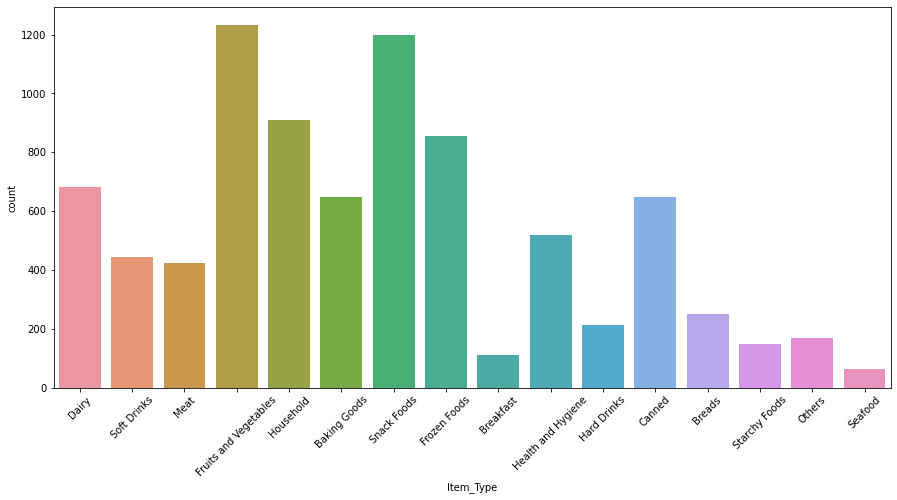

In [18]:
#univariate Analysis
#Item_Type
plt.figure(figsize = (15,7))
sns.countplot(Big_data.Item_Type)
plt.xticks(rotation = 45)

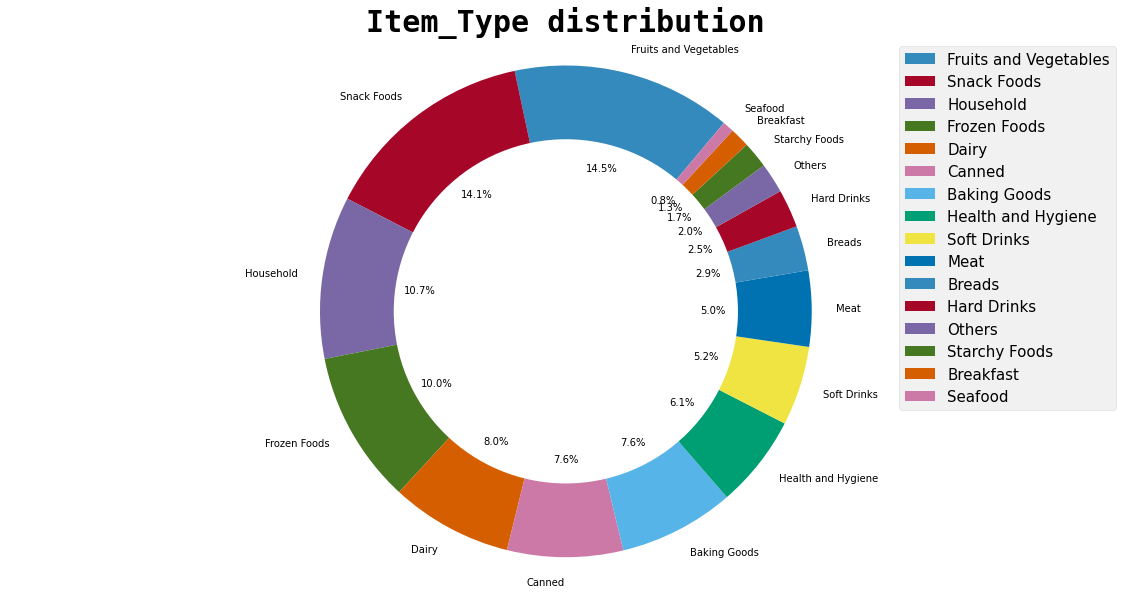

In [19]:
#UNIVARIATE ANALYSIS
# Creating a donut chart for 'Occupation'
relation = Big_data['Item_Type'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Item_Type distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

In [20]:
Big_data['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

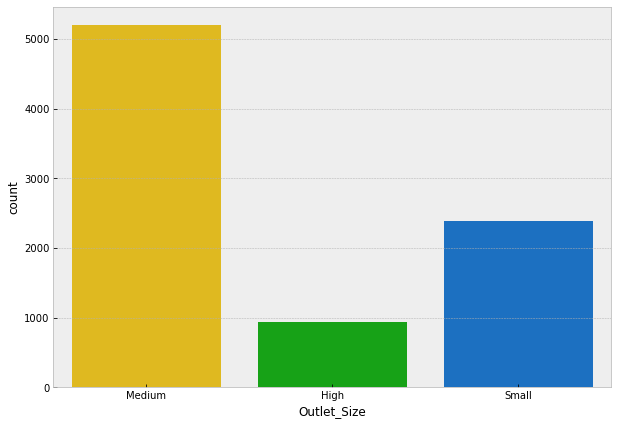

In [21]:

#univariate Analysis
#Outlet_Size
plt.figure(figsize = (10,7))
sns.countplot(Big_data.Outlet_Size, palette ='nipy_spectral_r')

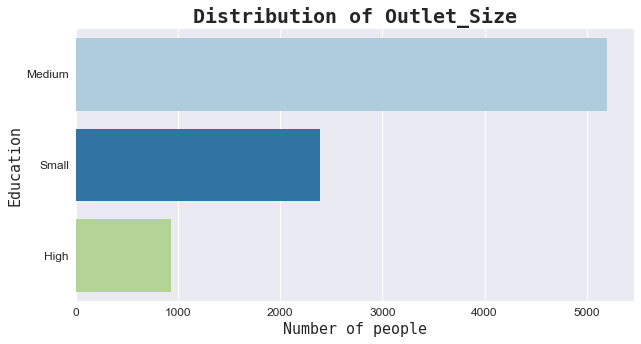

In [22]:
#UNIVARIATE ANALYSIS
# Creating a barplot for 'Big_data.Outlet_Size'

edu = Big_data['Outlet_Size'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index, palette='Paired')
plt.title('Distribution of Outlet_Size', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()


<AxesSubplot:xlabel='Outlet_Size', ylabel='Count'>

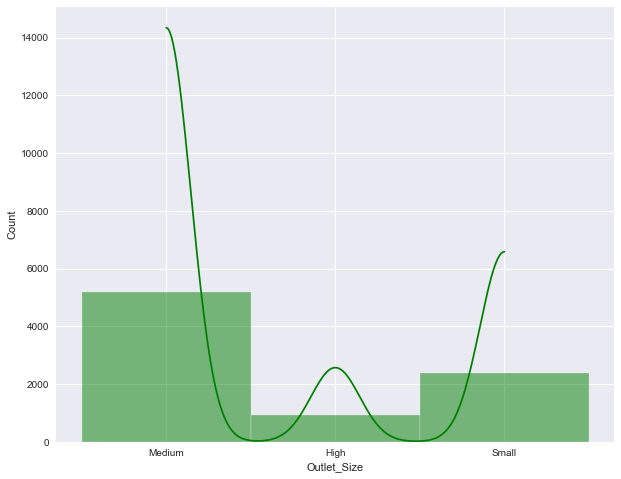

In [23]:
plt.figure(figsize = (10,8))
sns.histplot(Big_data.Outlet_Size, color ='g',kde='True ')

In [24]:
Big_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Count'>

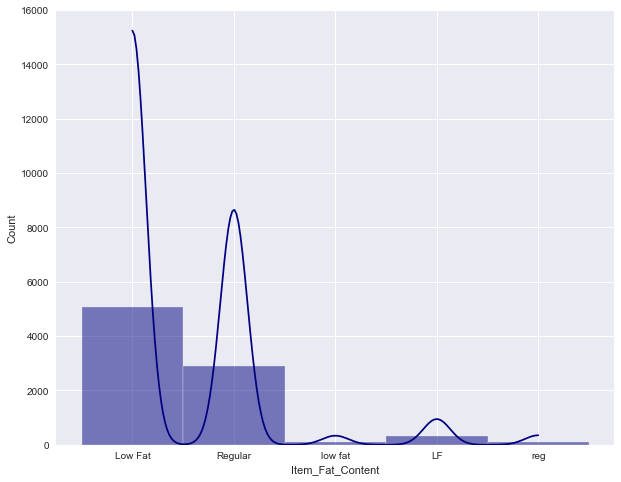

In [25]:
#UNIVARIATE ANALYSIS
#Item_Fat_Content
plt.figure(figsize = (10,8))
sns.histplot(Big_data.Item_Fat_Content, kde='True ', color='navy')

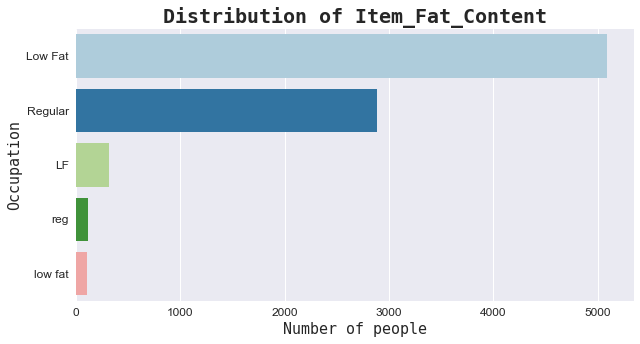

In [26]:
# Creating a barplot for '#Item_Fat_Content'

edu = Big_data['Item_Fat_Content'].value_counts()


plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index, palette='Paired')
plt.title('Distribution of Item_Fat_Content', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Occupation', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()


In [27]:
Big_data['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

<AxesSubplot:xlabel='Item_Visibility', ylabel='Count'>

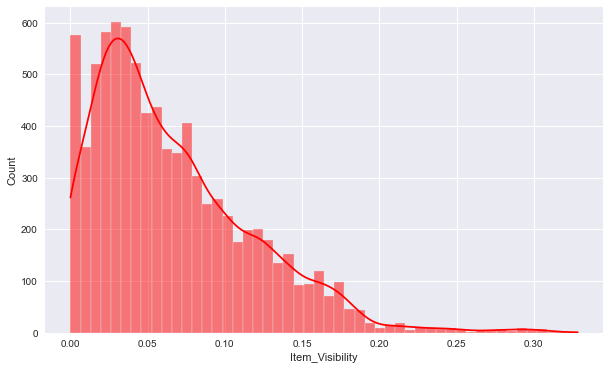

In [28]:
plt.figure(figsize = (10,6))
sns.histplot(Big_data.Item_Visibility, kde='True ', color='red')

In [29]:
Big_data['Item_MRP'].value_counts()

172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64

<AxesSubplot:xlabel='Item_MRP'>

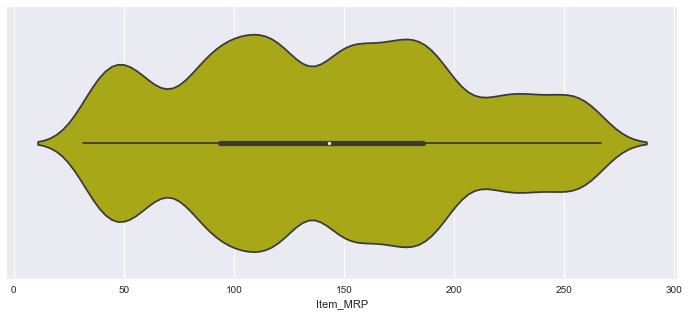

In [30]:
plt.figure(figsize=(12,5))
sns.violinplot(data=Big_data , x ='Item_MRP', color ='y')

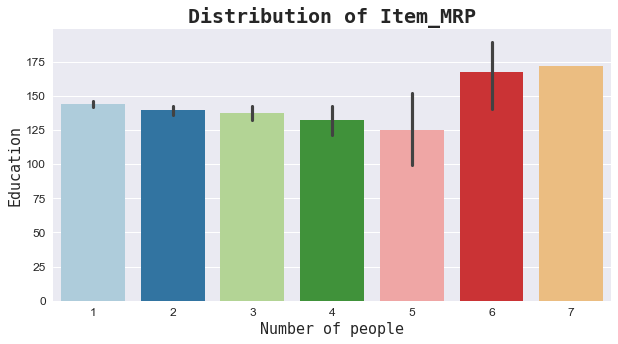

In [31]:
#UNIVARIATE ANALYSIS
# Creating a barplot for 'Item_MRP'

edu = Big_data['Item_MRP'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index, palette='Paired')
plt.title('Distribution of Item_MRP', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()


so we can see that the max of the MRP lies between the range of -- 100 to 200

In [32]:
Big_data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

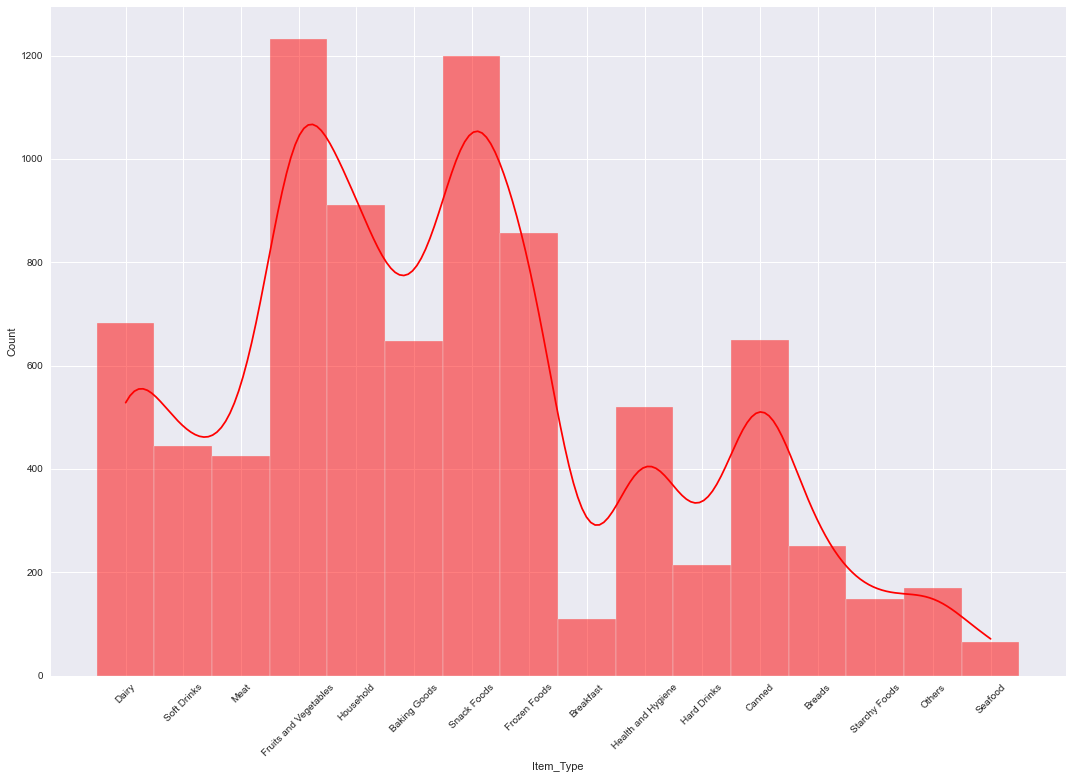

In [33]:
plt.figure(figsize = (15,10))
sns.histplot(Big_data.Item_Type, kde='True ', color='r')
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show


As here we can see that the Snack foods vegetable and the Household foods touches the highest in the the hist graph thus this the max in the item type than others

In [34]:
Big_data['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

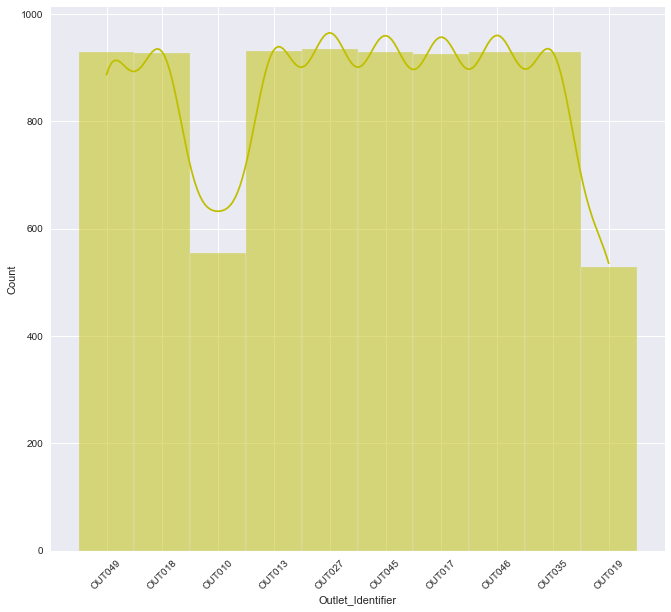

In [35]:
plt.figure(figsize = (11,10))
sns.histplot(Big_data.Outlet_Identifier, kde='True ', color='y')
plt.xticks(rotation = 45)

plt.show

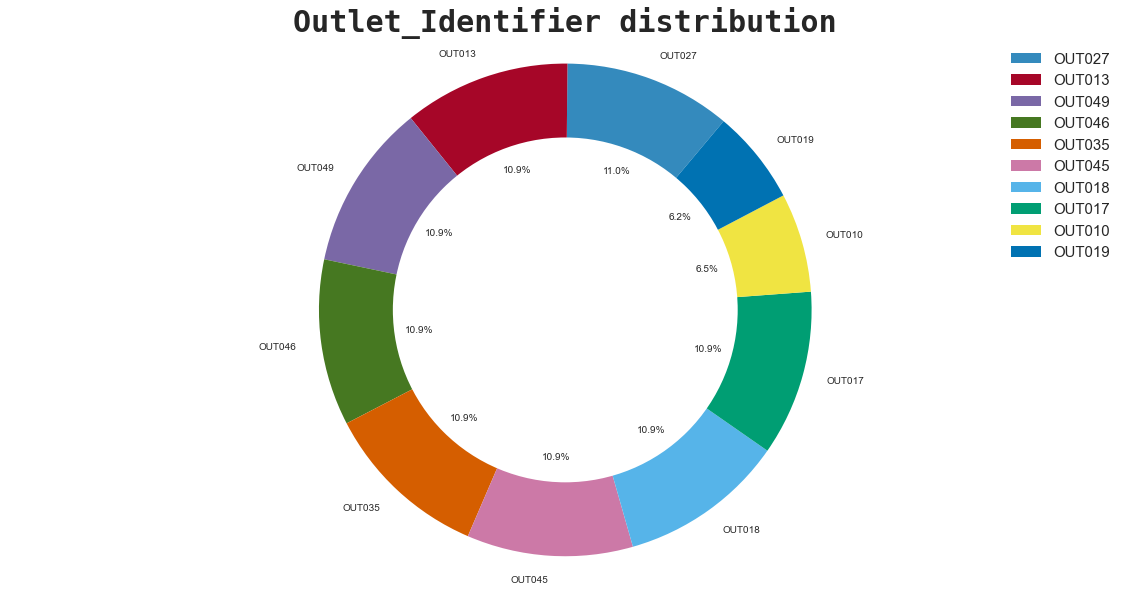

In [36]:
#UNIVARIATE ANALYSIS
# Creating a donut chart for 'Outlet_Identifier'
relation = Big_data['Outlet_Identifier'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Outlet_Identifier distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

In [37]:
Big_data['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

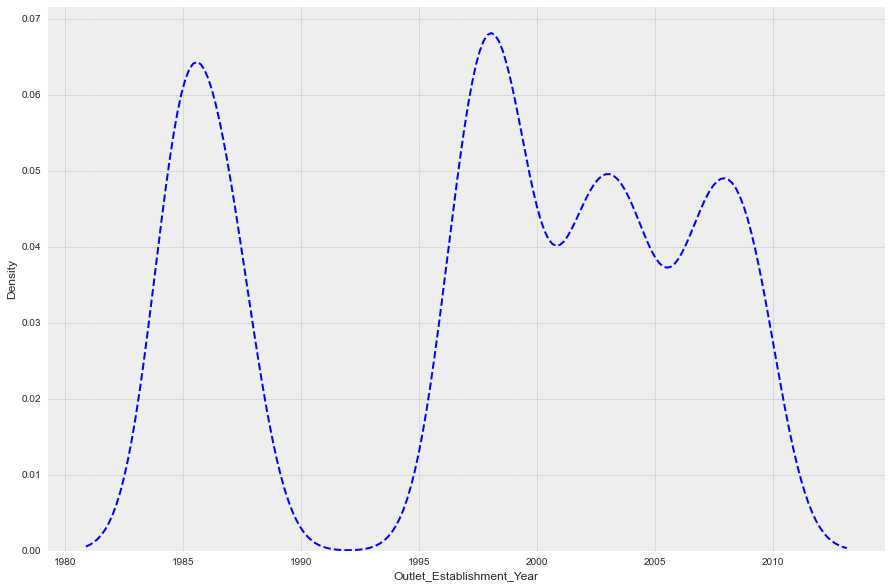

In [38]:
plt.figure(figsize = (15,10))
sns.kdeplot(Big_data.Outlet_Establishment_Year, color='b', linestyle='--')
plt.show

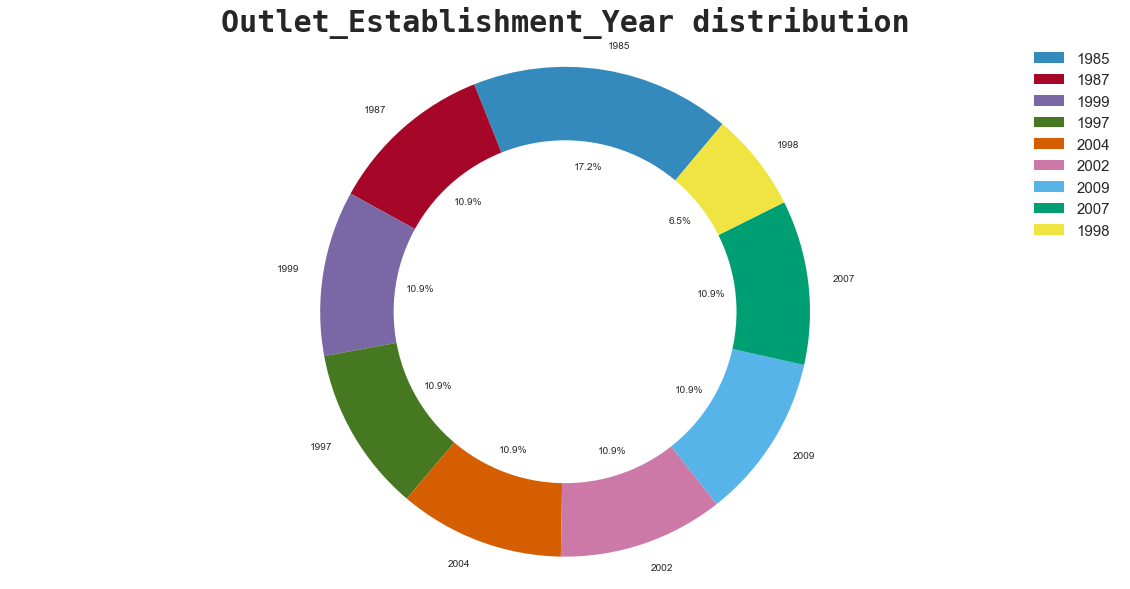

In [39]:
#UNIVARIATE ANALYSIS
# Creating a donut chart for 'Outlet_Establishment_Year'
relation = Big_data['Outlet_Establishment_Year'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Outlet_Establishment_Year distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

In [40]:
Big_data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

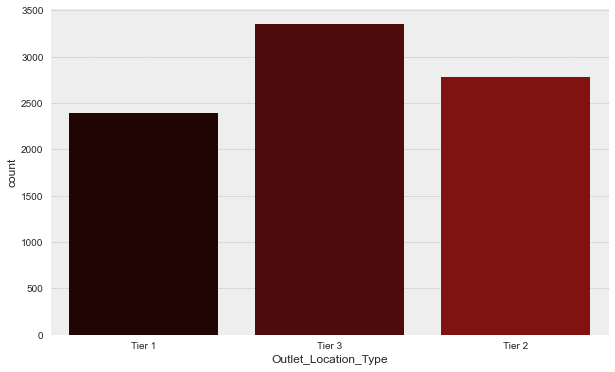

In [41]:
plt.figure(figsize = (10,6))
sns.countplot(Big_data.Outlet_Location_Type, palette ='flag_r', linestyle='--')
plt.show

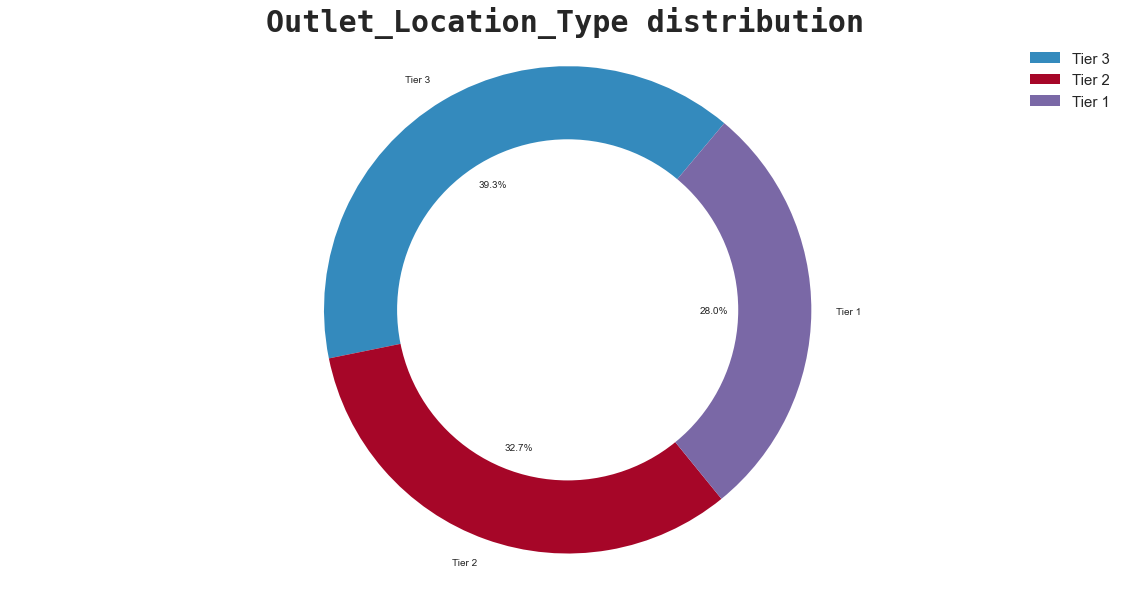

In [42]:
#UNIVARIATE ANALYSIS
# Creating a donut chart for 'Outlet_Location_Type'
relation = Big_data['Outlet_Location_Type'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Outlet_Location_Type distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

In [43]:
Big_data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

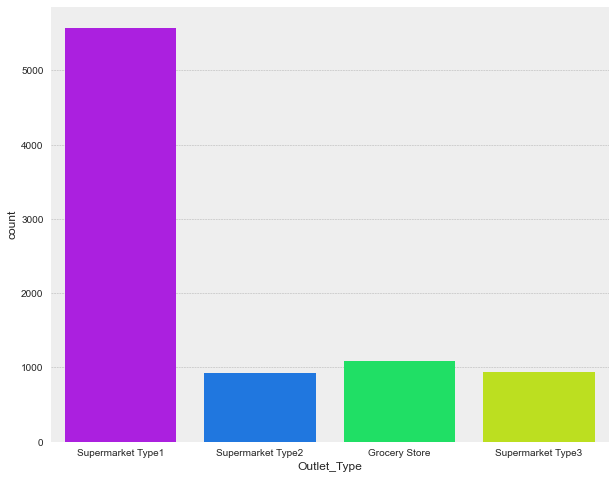

In [44]:
plt.figure(figsize = (10,8))
sns.countplot(Big_data.Outlet_Type,  palette='hsv_r')

<Figure size 1080x648 with 0 Axes>

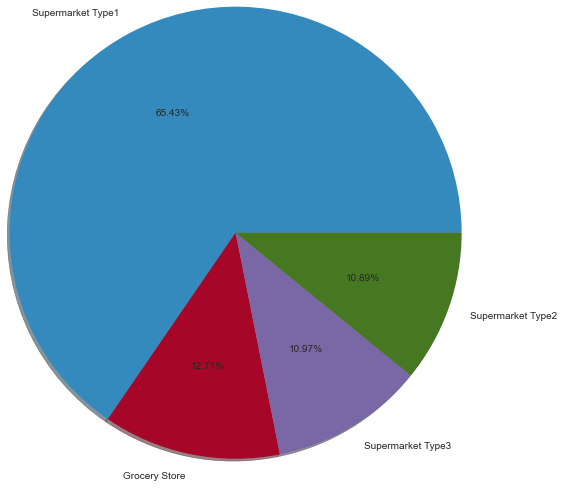

In [45]:
#using the Pie-chart for better understanding
labels = 'Supermarket Type1','Grocery Store','Supermarket Type3','Supermarket Type2'
plt.figure(figsize=(15,9))

fig, ax = plt.subplots()
ax.pie(Big_data['Outlet_Type'].value_counts(),labels = labels,radius =1.89,autopct = '%1.2f%%', shadow=True,)

plt.show()

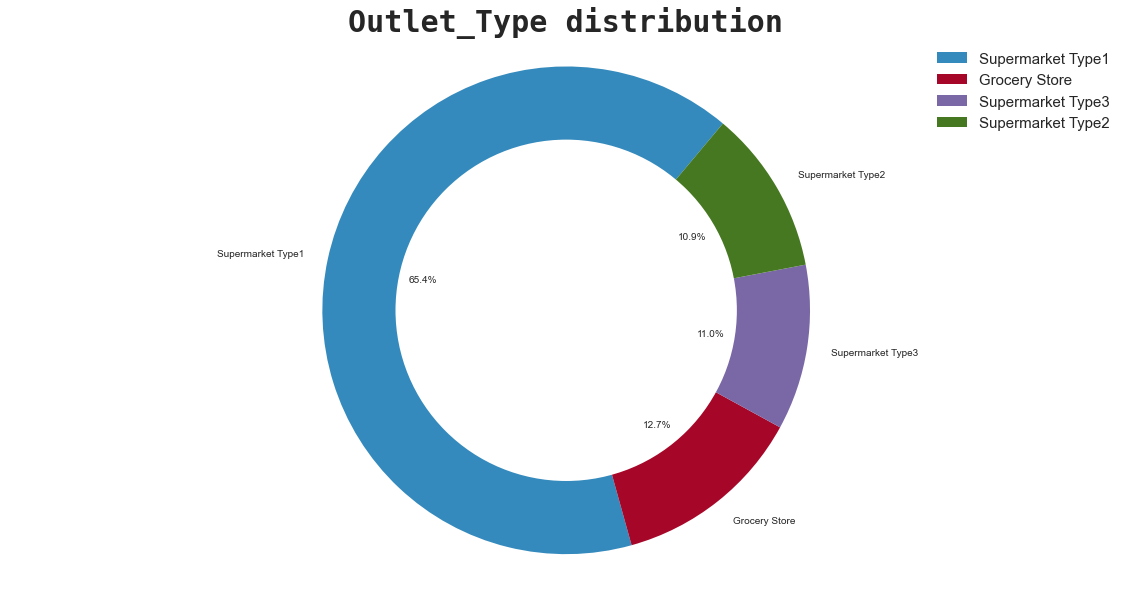

In [46]:
#UNIVARIATE ANALYSIS
# Creating a donut chart for 'Outlet_Type'
relation = Big_data['Outlet_Type'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Outlet_Type distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

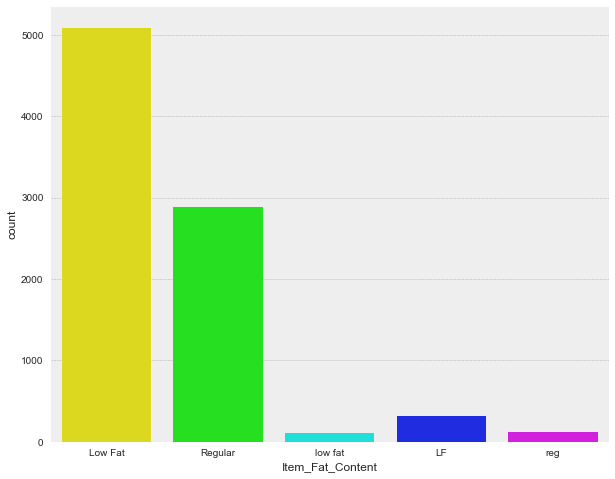

In [47]:
plt.figure(figsize = (10,8))
sns.countplot(Big_data.Item_Fat_Content, palette='hsv')

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

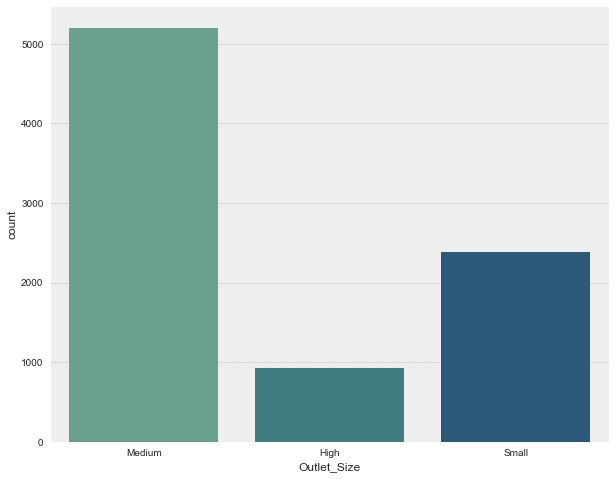

In [48]:
plt.figure(figsize = (10,8))
sns.countplot(Big_data.Outlet_Size, palette='crest')

# Bivariate Analysis

<AxesSubplot:title={'center':'Comparision between Item_Weight and Item_Outlet_Sales'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

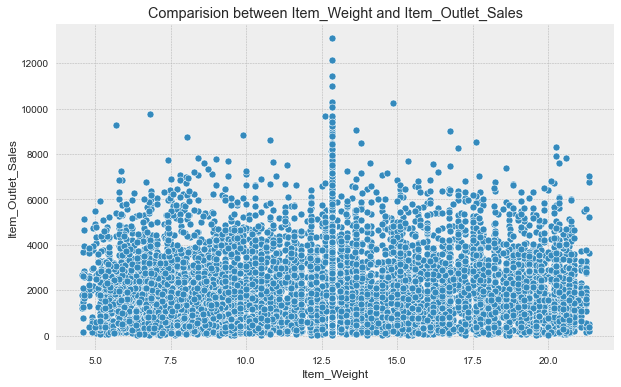

In [49]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparision between Item_Weight and Item_Outlet_Sales')
sns.scatterplot(Big_data['Item_Weight'],Big_data['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

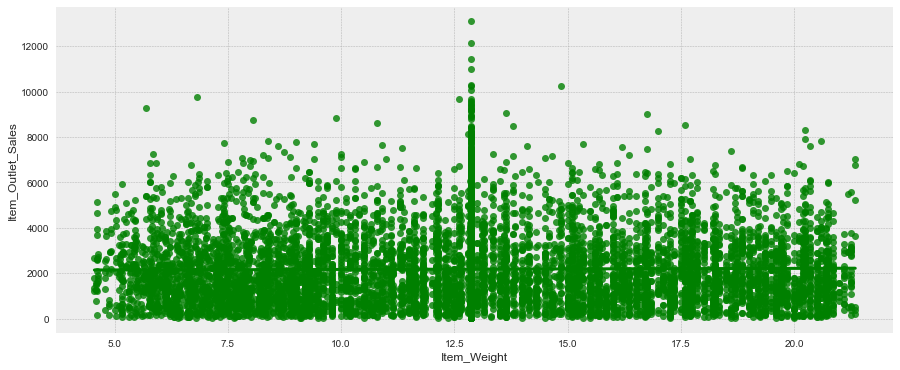

In [50]:
#Bivariate Analysis
plt.figure(figsize=(15,6))
sns.regplot(data=Big_data, x ='Item_Weight', y ='Item_Outlet_Sales',color='green')

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

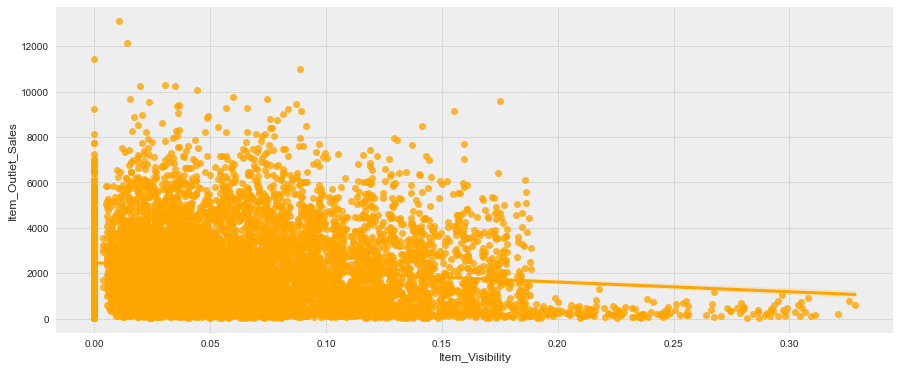

In [51]:
plt.figure(figsize=(15,6))
sns.regplot(data=Big_data, x ='Item_Visibility', y ='Item_Outlet_Sales',color='orange')

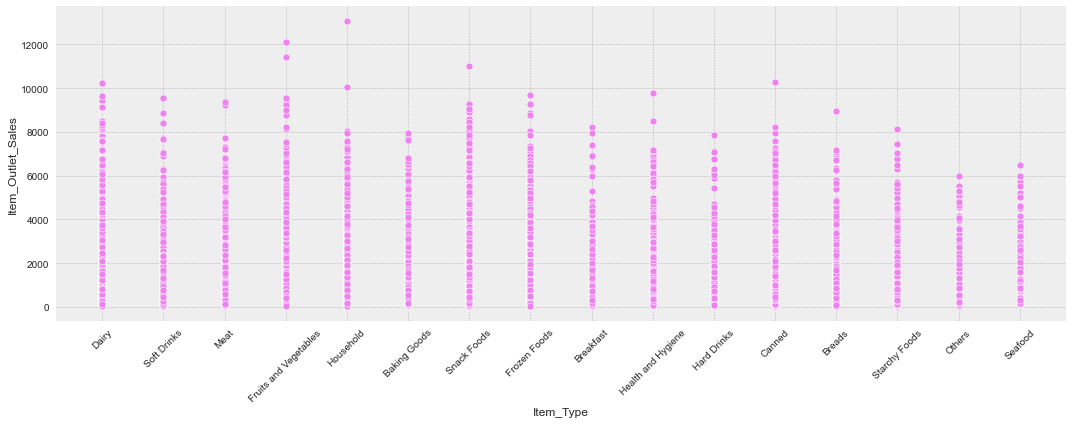

In [52]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=Big_data, x ='Item_Type', y ='Item_Outlet_Sales',color='violet')
plt.xticks(rotation=45)
plt.tight_layout()

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

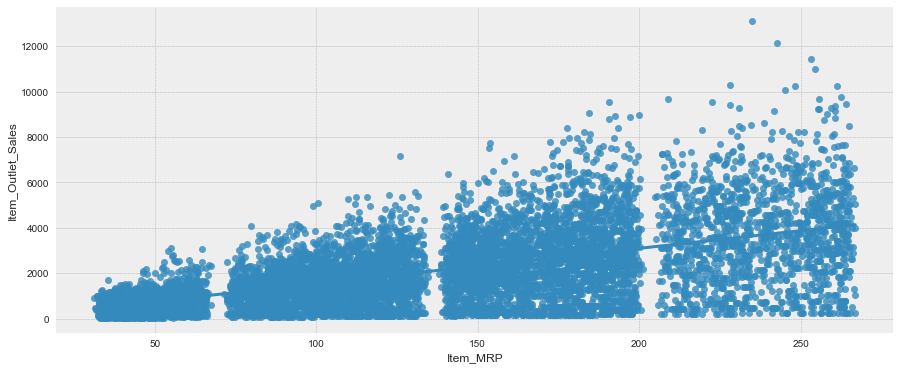

In [53]:
plt.figure(figsize=(15,6))
sns.regplot(data=Big_data, x ='Item_MRP', y ='Item_Outlet_Sales')

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

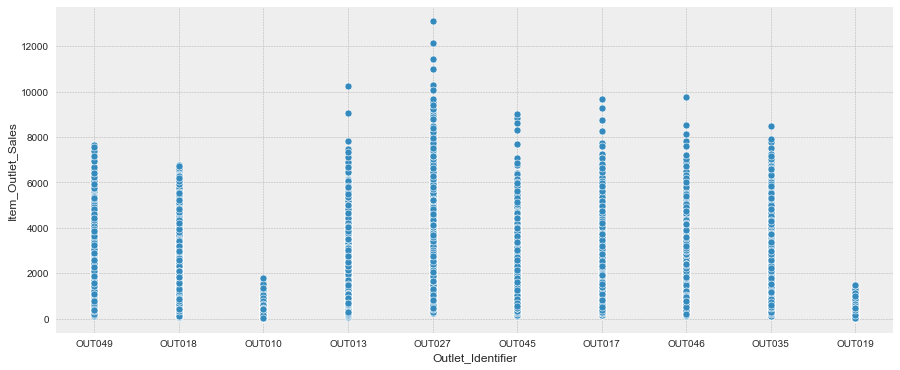

In [54]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=Big_data, x ='Outlet_Identifier', y ='Item_Outlet_Sales',palette ='Set2')

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

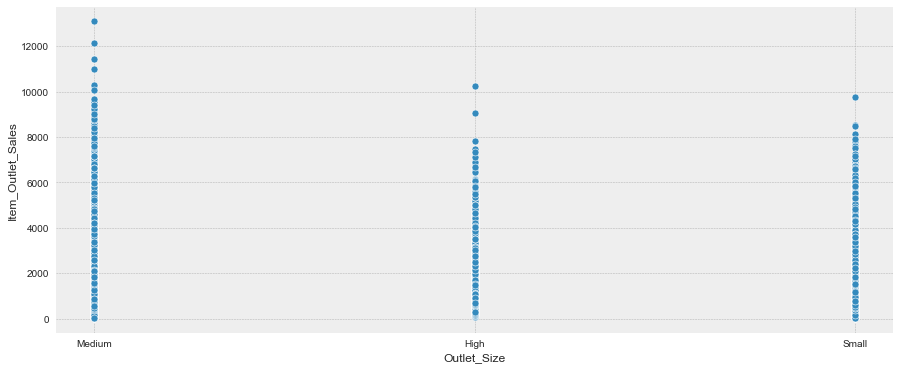

In [55]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=Big_data, x ='Outlet_Size', y ='Item_Outlet_Sales',palette ='Set3')

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

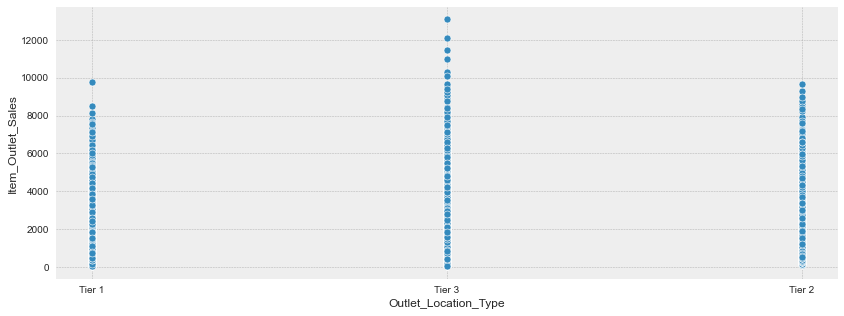

In [56]:
plt.figure(figsize=(14,5))
sns.scatterplot(data=Big_data  , x='Outlet_Location_Type', y ='Item_Outlet_Sales')

# multivariate analysis 

array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>]], dtype=object)

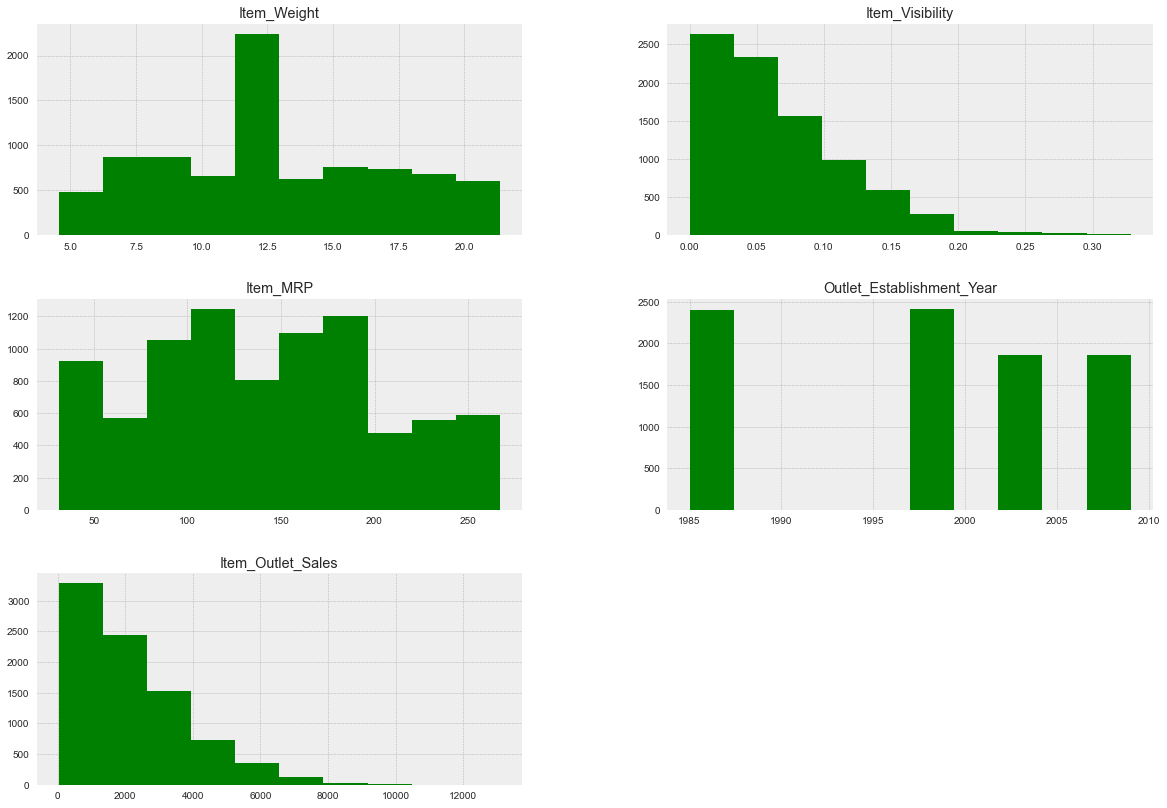

In [57]:
Big_data.hist(figsize=(20,14), color ='green')

# outliers Checking & Analysis

<AxesSubplot:>

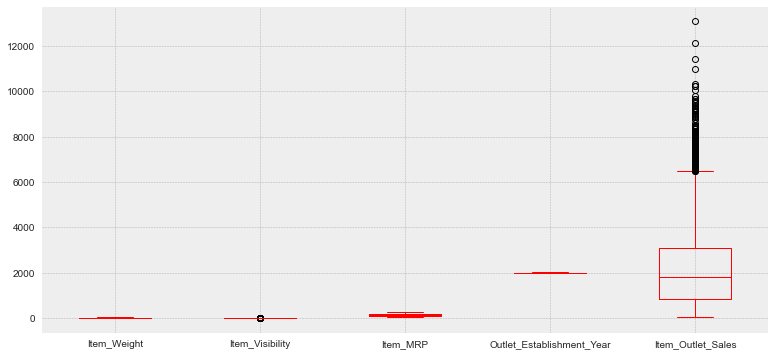

In [58]:
Big_data.plot(kind="box", figsize = (13,6), color="r")

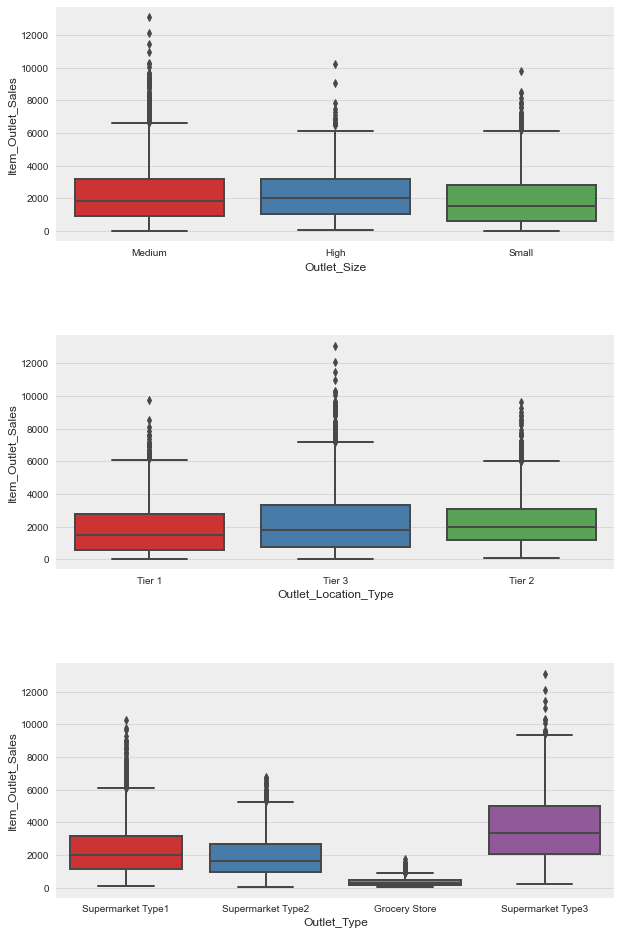

In [59]:
plt.figure(figsize = (10,9))

plt.subplot(311)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=Big_data, palette="Set1")

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=Big_data, palette="Set1")

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=Big_data, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

so we can see that we have only some outliers in the item_visibility column

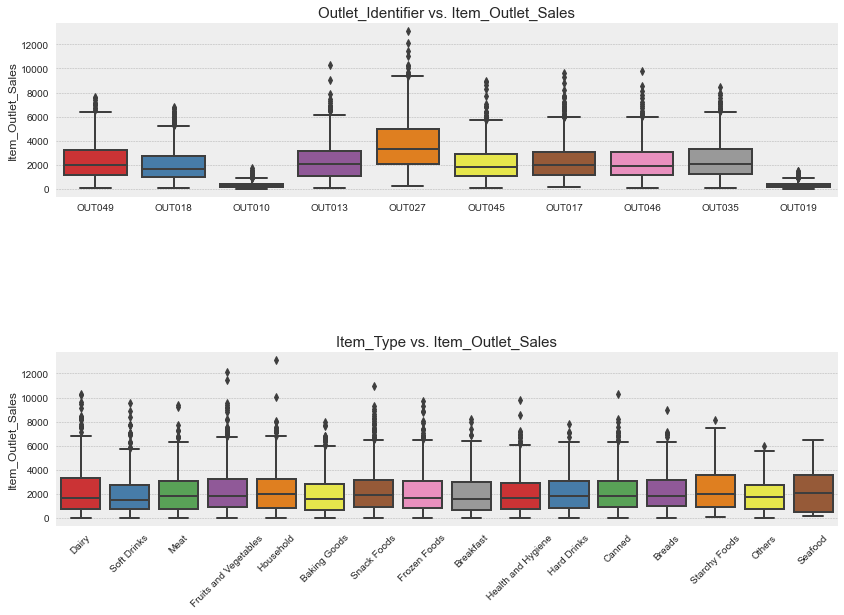

In [60]:
plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=Big_data, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=Big_data, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

In [61]:
Big_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Correlation Analysis

In [62]:
Big_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


Text(0.5, 1.0, 'Correlation matrix')

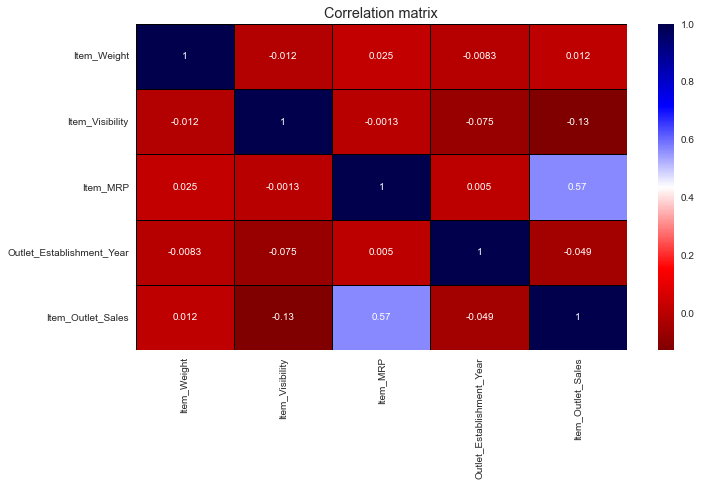

In [63]:
#Correalation using the Heatmap
plt.figure(figsize=(11,6))
sns.heatmap(Big_data.corr(), annot =True, cmap='seismic_r' , linecolor='black', linewidth=1,  robust=True)
plt.title('Correlation matrix')

# Encoding using the Ordinal encoder

In [66]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
Big_data["Outlet_Type"] = ord_enc.fit_transform(Big_data[["Outlet_Type"]])
Big_data['Outlet_Location_Type'] =ord_enc.fit_transform(Big_data[["Outlet_Location_Type"]])
Big_data['Outlet_Size'] =ord_enc.fit_transform(Big_data[["Outlet_Size"]])
Big_data['Item_Fat_Content'] =ord_enc.fit_transform(Big_data[["Item_Fat_Content"]])
Big_data['Item_Type'] =ord_enc.fit_transform(Big_data[["Item_Type"]])
Big_data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1.0,0.016047,4.0,249.8092,OUT049,1999,1.0,0.0,1.0,3735.1380
1,DRC01,5.92,2.0,0.019278,14.0,48.2692,OUT018,2009,1.0,2.0,2.0,443.4228
2,FDN15,17.50,1.0,0.016760,10.0,141.6180,OUT049,1999,1.0,0.0,1.0,2097.2700
3,FDX07,19.20,2.0,0.000000,6.0,182.0950,OUT010,1998,1.0,2.0,0.0,732.3800
4,NCD19,8.93,1.0,0.000000,9.0,53.8614,OUT013,1987,0.0,2.0,1.0,994.7052


# Checking for the Skewness

In [67]:
Big_data.skew()

Item_Weight                  0.090561
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

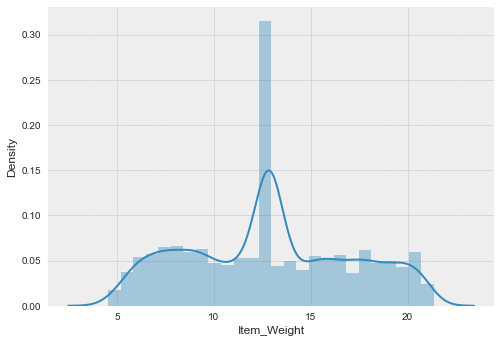

In [68]:
sns.distplot(Big_data['Item_Weight'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Density'>

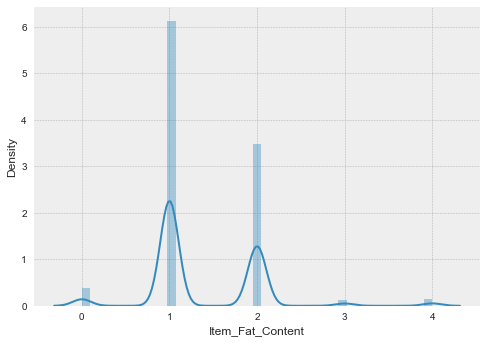

In [69]:
sns.distplot(Big_data['Item_Fat_Content'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

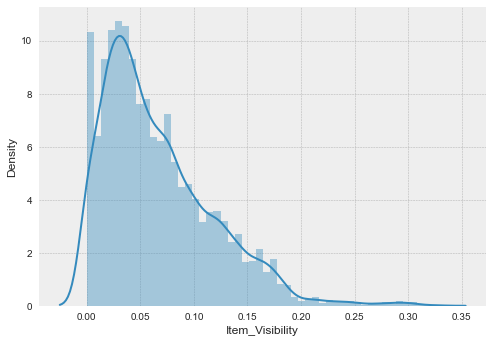

In [70]:
sns.distplot(Big_data['Item_Visibility'])

<AxesSubplot:xlabel='Item_Type', ylabel='Density'>

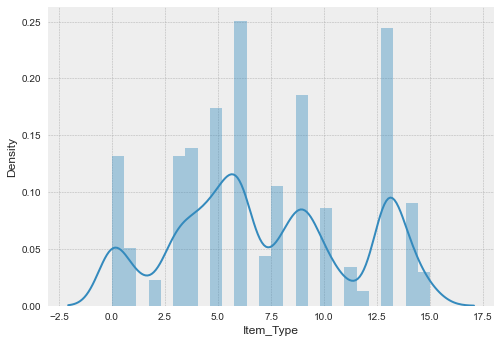

In [71]:
sns.distplot(Big_data['Item_Type'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

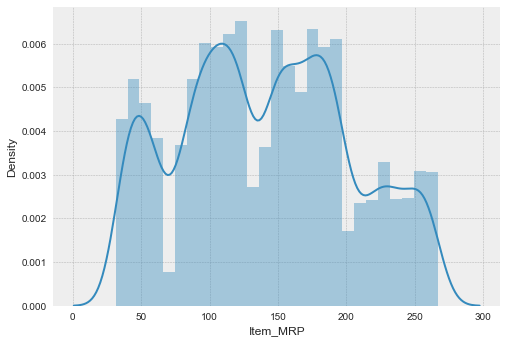

In [72]:
sns.distplot(Big_data['Item_MRP'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

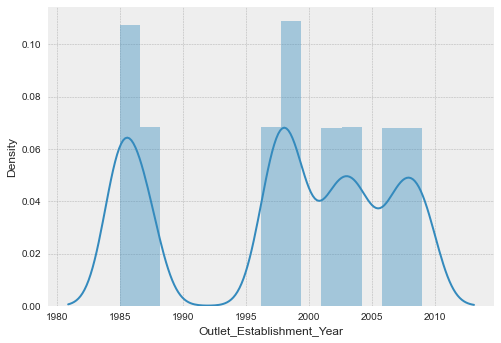

In [73]:
sns.distplot(Big_data['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='Density'>

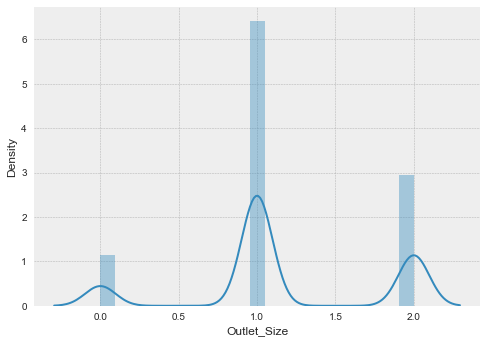

In [74]:
sns.distplot(Big_data['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Density'>

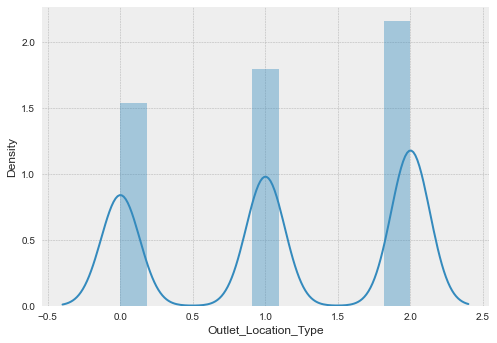

In [75]:
sns.distplot(Big_data['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='Density'>

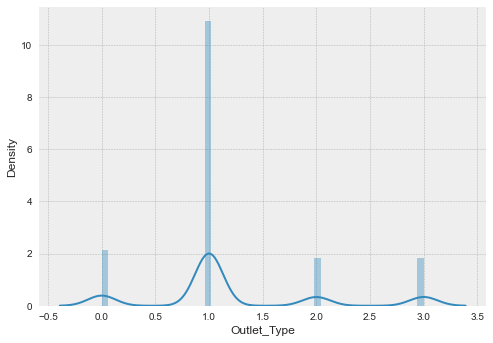

In [76]:
sns.distplot(Big_data['Outlet_Type'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

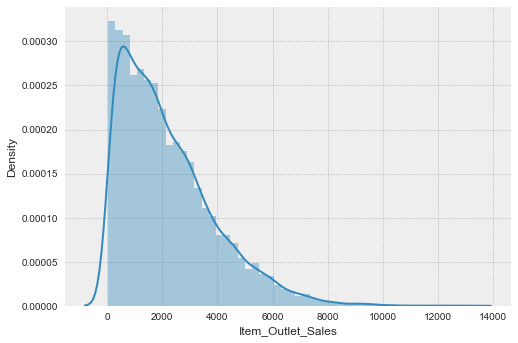

In [77]:
sns.distplot(Big_data['Item_Outlet_Sales'])

# Data cleaning

In [78]:
Big_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Removing some neccessary ouliers

In [79]:
# Using zscore to remove outliers in the feature item visibility
variables= Big_data[['Item_Visibility']]
from scipy.stats import zscore

z=np.abs(zscore(variables))

# Creating new dataframe
new_df=Big_data[(z<3).all(axis=1)]
new_df


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,1.0,0.016047,4.0,249.8092,OUT049,1999,1.0,0.0,1.0,3735.1380
1,DRC01,5.920,2.0,0.019278,14.0,48.2692,OUT018,2009,1.0,2.0,2.0,443.4228
2,FDN15,17.500,1.0,0.016760,10.0,141.6180,OUT049,1999,1.0,0.0,1.0,2097.2700
3,FDX07,19.200,2.0,0.000000,6.0,182.0950,OUT010,1998,1.0,2.0,0.0,732.3800
4,NCD19,8.930,1.0,0.000000,9.0,53.8614,OUT013,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,1.0,0.056783,13.0,214.5218,OUT013,1987,0.0,2.0,1.0,2778.3834
8519,FDS36,8.380,2.0,0.046982,0.0,108.1570,OUT045,2002,1.0,1.0,1.0,549.2850
8520,NCJ29,10.600,1.0,0.035186,8.0,85.1224,OUT035,2004,2.0,1.0,1.0,1193.1136
8521,FDN46,7.210,2.0,0.145221,13.0,103.1332,OUT018,2009,1.0,2.0,2.0,1845.5976


In [80]:
'This is  the new  old data',Big_data.shape

('This is  the new  old data', (8523, 12))

In [81]:
'This is  the  new  train data ', new_df.shape

('This is  the  new  train data ', (8428, 12))

In [82]:
# Let's check the the data loss
data_loss = (8523-8428)/8523*100
data_loss

1.1146309984747156

HENCE, THE TOTAL DATA LOSS IS 1.11 % , WHICH IS IN THE RANGE OF ACCEPTABLE LIMIT

# Splitting the data into X and y

In [83]:

x = new_df.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'], axis=1)
y =new_df.iloc[:,-1]

In [84]:
x.shape

(8428, 9)

In [85]:
y.shape

(8428,)

In [86]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,1.0,0.016047,4.0,249.8092,1999,1.0,0.0,1.0
1,5.920,2.0,0.019278,14.0,48.2692,2009,1.0,2.0,2.0
2,17.500,1.0,0.016760,10.0,141.6180,1999,1.0,0.0,1.0
3,19.200,2.0,0.000000,6.0,182.0950,1998,1.0,2.0,0.0
4,8.930,1.0,0.000000,9.0,53.8614,1987,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...
8518,6.865,1.0,0.056783,13.0,214.5218,1987,0.0,2.0,1.0
8519,8.380,2.0,0.046982,0.0,108.1570,2002,1.0,1.0,1.0
8520,10.600,1.0,0.035186,8.0,85.1224,2004,2.0,1.0,1.0
8521,7.210,2.0,0.145221,13.0,103.1332,2009,1.0,2.0,2.0


# Feature Scaling

In [103]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
x = new_df.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'], axis=1)
y =new_df.iloc[:,-1]

scaler= StandardScaler()
scaled_X = scaler.fit_transform(x)


# Checking for the multicollinearity using Variance Inflation Factor


In [105]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif.head(10)

,Features,vif
0,Item_Weight,1.001754
1,Item_Fat_Content,1.015640
2,Item_Visibility,1.028959
3,Item_Type,1.016558
4,Item_MRP,1.001633
5,Outlet_Establishment_Year,1.070944
6,Outlet_Size,1.702158
7,Outlet_Location_Type,2.039928
8,Outlet_Type,1.362813


# Removing the skewness with the power_transformer

In [87]:
from sklearn.preprocessing  import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.820763  , -0.52071354, -1.14226961, ..., -0.28556618,
        -1.3800971 , -0.14516058],
       [-1.73031914,  1.01170173, -1.03291304, ..., -0.28556618,
         1.08970949,  1.03470397],
       [ 1.08264587, -0.52071354, -1.11787359, ..., -0.28556618,
        -1.3800971 , -0.14516058],
       ...,
       [-0.49544676, -0.52071354, -0.53775357, ...,  1.39823948,
        -0.13724678, -0.14516058],
       [-1.3704964 ,  1.01170173,  1.53830862, ..., -0.28556618,
         1.08970949,  1.03470397],
       [ 0.49007876, -0.52071354, -0.268203  , ...,  1.39823948,
        -1.3800971 , -0.14516058]])

In [88]:
x.shape

(8428, 9)

In [89]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8
0,-0.820763,-0.520714,-1.142270,-0.713260,1.622782,0.039060,-0.285566,-1.380097,-0.145161
1,-1.730319,1.011702,-1.032913,1.505750,-1.595589,1.453989,-0.285566,1.089709,1.034704
2,1.082646,-0.520714,-1.117874,0.684503,0.081596,0.039060,-0.285566,-1.380097,-0.145161
3,1.442689,1.011702,-1.734798,-0.216081,0.690021,-0.085435,-0.285566,1.089709,-1.974400
4,-0.915510,-0.520714,-1.734798,0.468305,-1.476469,-1.281792,-1.921762,1.089709,-0.145161
...,...,...,...,...,...,...,...,...,...
8423,-1.464995,-0.520714,0.033409,1.306137,1.147914,-1.281792,-1.921762,1.089709,-0.145161
8424,-1.058287,1.011702,-0.212619,-1.924399,-0.462744,0.430122,-0.285566,-0.137247,-0.145161
8425,-0.495447,-0.520714,-0.537754,0.246688,-0.867711,0.706147,1.398239,-0.137247,-0.145161
8426,-1.370496,1.011702,1.538309,1.306137,-0.548634,1.453989,-0.285566,1.089709,1.034704


In [90]:
pd.DataFrame(x).skew()

0   -0.068809
1    0.031597
2    0.115444
3   -0.164518
4   -0.114976
5   -0.213023
6   -0.041756
7   -0.221268
8    0.009297
dtype: float64

In [91]:
x = pd.DataFrame(x)

 we have removed the skewness from the model

# Plotting the columns for checking the Normal distributions


Text(0.5, 1.0, 'The Normal distribution Kernel density estimators  for all  the columns')

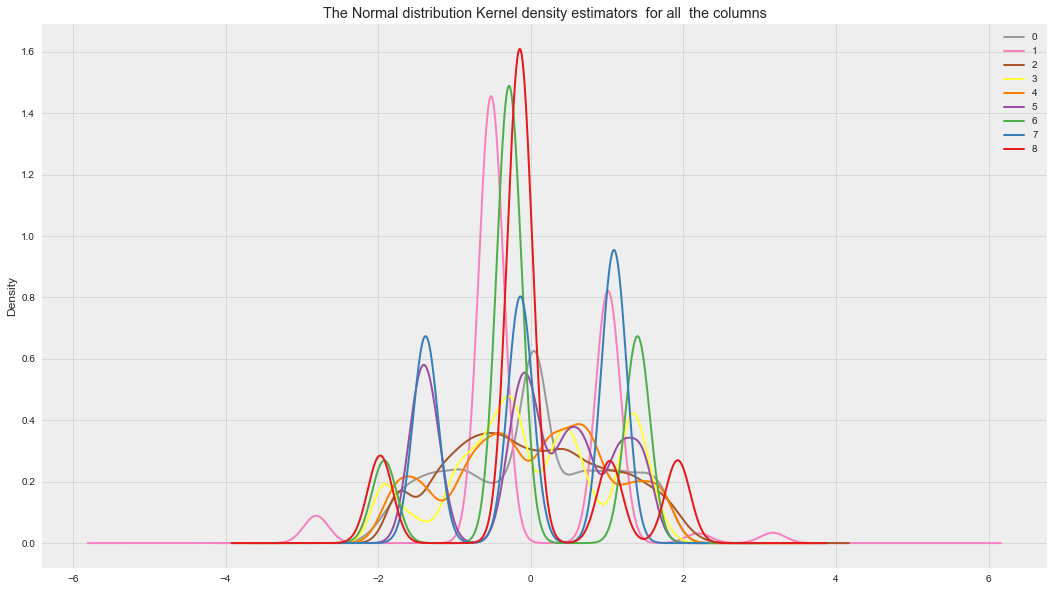

In [92]:
x.plot( kind='kde', figsize=(18,10), stacked=False, cmap='Set1_r')
plt.title('The Normal distribution Kernel density estimators  for all  the columns')

so for now we can see almost most of them areon the Normal distribution curve but because of some inverse relationships we are having some plots that are -ve skewed still which just shows us that they are having a inverse relation with the target variable

# Variance threshold method

In [93]:
from sklearn.feature_selection import VarianceThreshold
# we are  importing  the  sklearn's  feature  selection technique  here  to extract  some imp  feature   from  the  model
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(x)

VarianceThreshold(threshold=0)

In [94]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [95]:
x =pd.DataFrame(x)

In [96]:
x.columns[var_thres.get_support()]

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [97]:
x.shape


(8428, 9)

In [98]:
# taking  out  all the  constant  columns 
cons_columns = [column for column in x.columns
               if column not in x.columns[var_thres.get_support()]]
print(len(cons_columns))

0


In [99]:
from sklearn.feature_selection import SelectKBest, f_classif
bestfeat = SelectKBest(score_func = f_classif, k =9)
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)


In [100]:

fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(9,'Score'))
   

   Feature     Score
4        4  3.442038
8        8  2.537242
5        5  1.193769
3        3  1.187482
2        2  1.134038
1        1  1.077495
0        0  1.036837
7        7  1.035182
6        6  1.004078


In [101]:
xbest = x.drop([6],axis=1)

In [102]:
xbest

,0,1,2,3,4,5,7,8
0,-0.820763,-0.520714,-1.142270,-0.713260,1.622782,0.039060,-1.380097,-0.145161
1,-1.730319,1.011702,-1.032913,1.505750,-1.595589,1.453989,1.089709,1.034704
2,1.082646,-0.520714,-1.117874,0.684503,0.081596,0.039060,-1.380097,-0.145161
3,1.442689,1.011702,-1.734798,-0.216081,0.690021,-0.085435,1.089709,-1.974400
4,-0.915510,-0.520714,-1.734798,0.468305,-1.476469,-1.281792,1.089709,-0.145161
...,...,...,...,...,...,...,...,...
8423,-1.464995,-0.520714,0.033409,1.306137,1.147914,-1.281792,1.089709,-0.145161
8424,-1.058287,1.011702,-0.212619,-1.924399,-0.462744,0.430122,-0.137247,-0.145161
8425,-0.495447,-0.520714,-0.537754,0.246688,-0.867711,0.706147,-0.137247,-0.145161
8426,-1.370496,1.011702,1.538309,1.306137,-0.548634,1.453989,1.089709,1.034704


Text(0.5, 1.0, 'The curve after Feature  selection with 8 features')

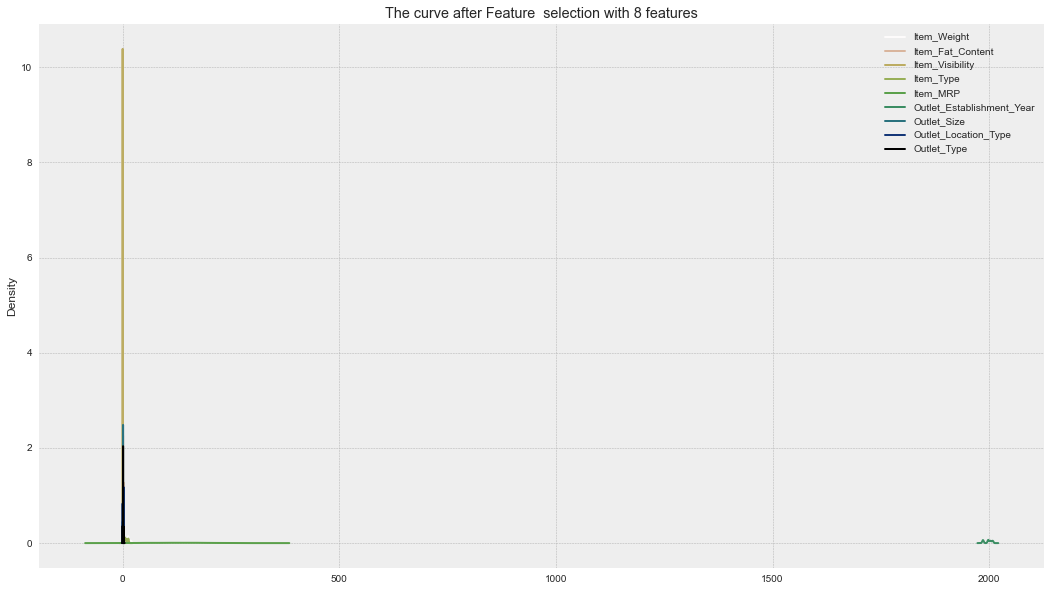

In [106]:
x.plot( kind='kde', figsize=(18,10), cmap='gist_earth_r')
plt.title('The curve after Feature  selection with 8 features')

In [107]:
#Building base model
from sklearn.model_selection import train_test_split

In [108]:
from sklearn.metrics import r2_score, mean_absolute_error

# Checking for the best Random state to remove bais among the models

In [109]:
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(xbest,y,test_size = .20, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")


Best Accuracy is: 0.5793117121792004 on random_state: 71


In [110]:
#Splittig the -train & test data
x_train,x_test,y_train,y_test = train_test_split(xbest,y,test_size = .20, random_state = 69)

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors  import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error


In [112]:
#Random forest Regression Model
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor(n_estimators=600, random_state=69)
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('Mean abs error:',mean_absolute_error(y_test, predRFR))
print('Mean squared error:',mean_squared_error(y_test, predRFR))


R2_Score: 0.5818638135380443
Mean abs error: 791.837434035192
Mean squared error: 1277697.0196783482


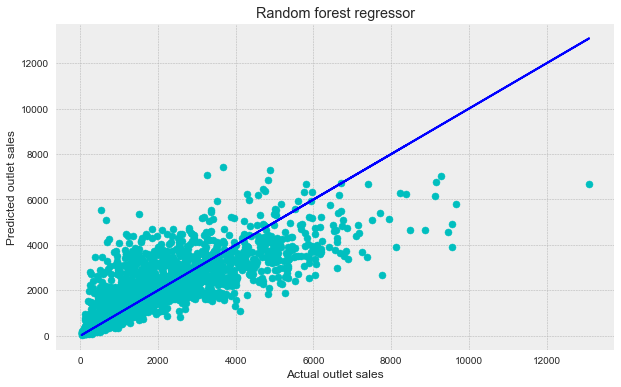

In [113]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predRFR,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual outlet sales")
plt.ylabel("Predicted outlet sales")
plt.title("Random forest regressor")
plt.show()

In [114]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('Mean abs error:',mean_absolute_error(y_test, predLR))
print('Mean squared error:',mean_squared_error(y_test, predLR))


R2_score: 0.527678404416547
Mean abs error: 908.2810025124011
Mean squared error: 1443271.1507536748


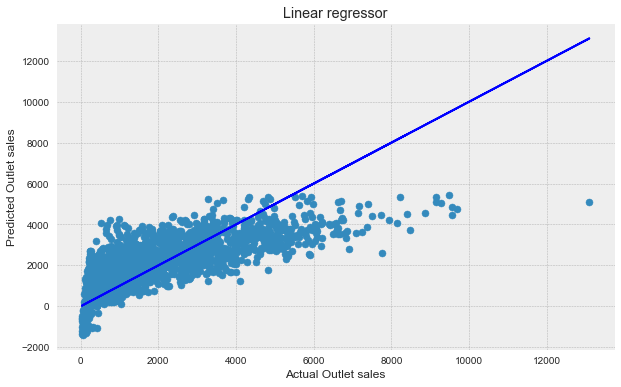

In [115]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predLR,cmap='set1')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Outlet sales")
plt.ylabel("Predicted Outlet sales")
plt.title("Linear regressor")
plt.show()

In [116]:
# Checking R2 score for KNN regressor
knn=KNeighborsRegressor(n_neighbors=9 )
knn.fit(x_train,y_train)

#prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('Mean abs error:',mean_absolute_error(y_test, predknn))
print('Mean squared error:',mean_squared_error(y_test, predknn))



R2_Score: 0.5632589162424917
Mean abs error: 819.2629948859892
Mean squared error: 1334547.927577735


Text(0.5, 1.0, 'K-nearest neighbors  regressor')

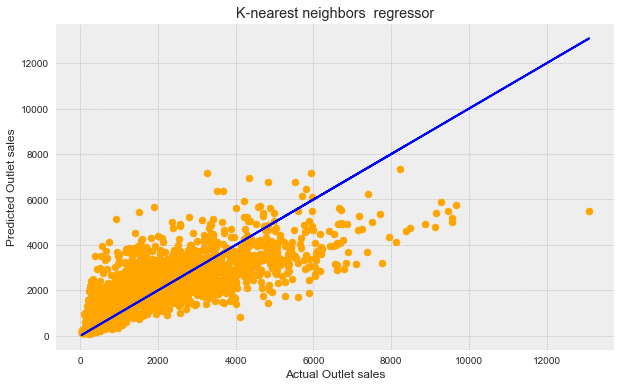

In [117]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predknn,color='orange')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Outlet sales")
plt.ylabel("Predicted Outlet sales")
plt.title("K-nearest neighbors  regressor")

In [118]:
#Support Vector Regression Mode
# Checking R2 score for svr
sv= SVR(kernel='linear')
sv.fit(x_train,y_train)

#prediction
predsv=sv.predict(x_test)
print('R2_Score:',r2_score(y_test,predsv))
print('Mean abs error:',mean_absolute_error(y_test, predsv))
print('Mean squared error:',mean_squared_error(y_test, predsv))



R2_Score: 0.4802061956939644
Mean abs error: 907.5741162263961
Mean squared error: 1588331.783069723


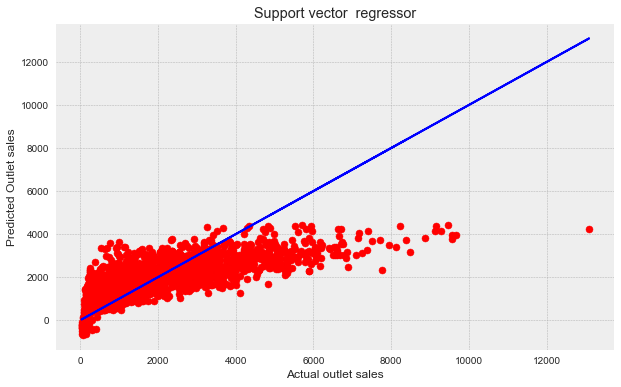

In [119]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predsv,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual outlet sales")
plt.ylabel("Predicted Outlet sales")
plt.title("Support vector  regressor")
plt.show()

In [120]:
#Grdient boosting Regressor
# Checking R2 score for svr
Gb= GradientBoostingRegressor(n_estimators=400,  random_state=69, learning_rate=0.1, max_depth=3)
Gb.fit(x_train,y_train)

#prediction
predGb=Gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predGb))
print('Mean abs error:',mean_absolute_error(y_test, predGb))
print('Mean squared error:',mean_squared_error(y_test, predGb))


R2_Score: 0.5955279575181525
Mean abs error: 778.8346001136067
Mean squared error: 1235943.5512986665


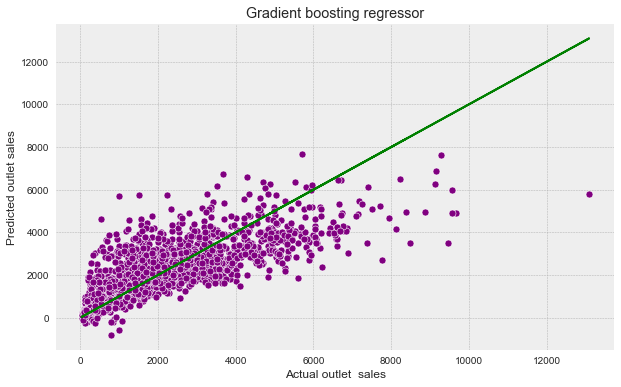

In [121]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=predGb,color='purple')
plt.plot(y_test,y_test,color='g')
plt.xlabel("Actual outlet  sales")
plt.ylabel("Predicted outlet sales")
plt.title("Gradient boosting regressor")
plt.show()

so we can see that the gradient boosting regressor is giving the result even better than the Random forest regressor thus we will be now going for the cross validation of all the model to remove any overfitting

In [122]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

# Model Cross Validation

In [124]:
from sklearn.model_selection import cross_val_score

In [125]:
#Random forest Regression
cross_val_score(RFR,xbest,y,cv=5).mean()

0.5439528953807777

In [126]:
#Linear Regressor
cross_val_score(LR,xbest,y,cv=5).mean()

0.5170918600778599

In [127]:
#KNN regressor
cross_val_score(knn,xbest,y,cv=5).mean()

0.5365587769010979

In [128]:
#SVR Regression
cross_val_score(sv,xbest,y,cv=5).mean()

0.470651096630084

In [129]:
#Gradient Boosting Regressor
cross_val_score(Gb,xbest,y,cv=5).mean()

0.5677682486686063

So accroding to the Cross validation score of all the model we can see that the best cv score is here is again for the gradient boosting regressor

# Hyper Parameter Tuning

In [130]:
from sklearn.model_selection import GridSearchCV

In [131]:
parameter = {'n_estimators':[100,200,300,400],
'learning_rate':[0.1,0.01,0.001,1],
 'subsample': [0.1,0.2,0.3,0.5,1],
 'max_depth':[1,2,3,4],
 'alpha':[0.1,0.01,0.001,1]}


In [132]:

GridCV = GridSearchCV(GradientBoostingRegressor(),parameter,cv=6,n_jobs = 3,verbose = 2)


In [133]:
GridCV.fit(x_train,y_train)

Fitting 6 folds for each of 1280 candidates, totalling 7680 fits


GridSearchCV(cv=6, estimator=GradientBoostingRegressor(), n_jobs=3,
             param_grid={'alpha': [0.1, 0.01, 0.001, 1],
                         'learning_rate': [0.1, 0.01, 0.001, 1],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 200, 300, 400],
                         'subsample': [0.1, 0.2, 0.3, 0.5, 1]},
             verbose=2)

In [134]:
GridCV.best_params_

{'alpha': 0.001,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 400,
 'subsample': 0.5}

In [135]:
Best_mod = GradientBoostingRegressor(n_estimators=400,alpha=0.001,learning_rate= 0.01, max_depth= 3, subsample = 1)
Best_mod.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.001, learning_rate=0.01, n_estimators=400,
                          subsample=1)

In [136]:
gbpred = Best_mod.predict(x_test)

acc = r2_score(y_test,gbpred)
print(acc*100)

62.14110393689373


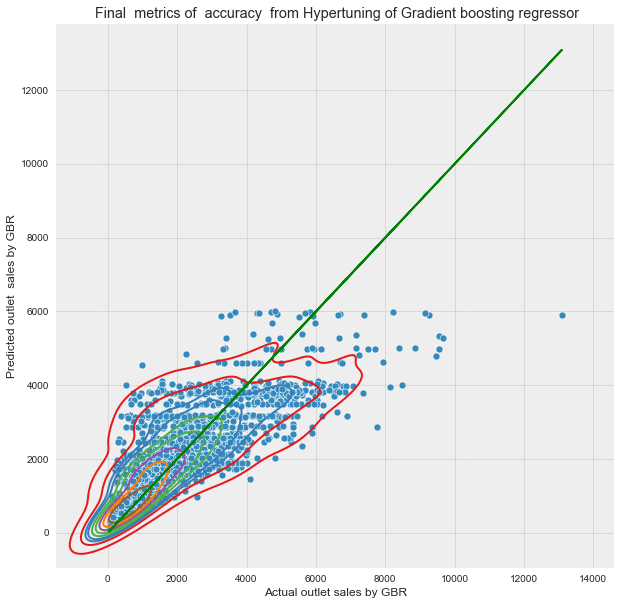

In [137]:
#Verifying the final  performance of the model by graph
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=gbpred,palette='Set2')
sns.kdeplot(x=y_test,y=gbpred, cmap='Set1')
plt.plot(y_test,y_test,color='g')
plt.xlabel("Actual outlet sales by GBR")
plt.ylabel("Predicted outlet  sales by GBR")
plt.title(" Final  metrics of  accuracy  from Hypertuning of Gradient boosting regressor")
plt.show()

# Conclusion 

In [139]:
import numpy as np
a = np.array(y_test)
predicted = np.array(Best_mod.predict(x_test))
Bigmart_model = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
Bigmart_model

,Original,Predicted
0,8388.4142,5021.591396
1,1640.5312,1748.657305
2,2048.6666,1893.560549
3,2966.1390,1795.975072
4,452.7440,1894.509389
...,...,...
1681,372.8480,730.823370
1682,143.8128,429.717815
1683,2024.0320,2114.767971
1684,3900.9222,2461.991118


Text(0.5, 1.0, 'Original vs predicted  graph')

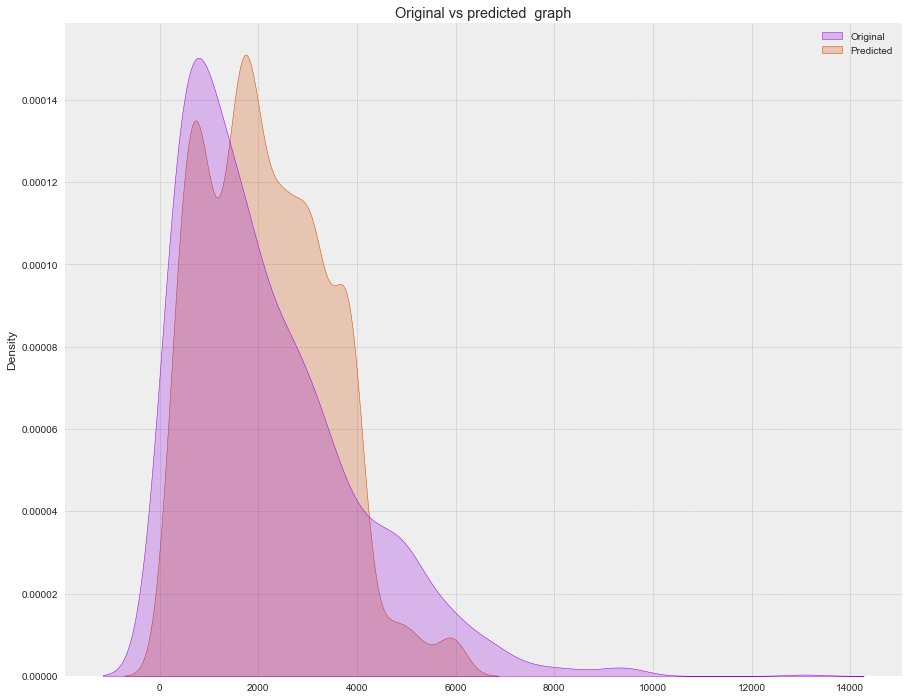

In [140]:
plt.figure(figsize=(15,12))
sns.kdeplot(data=Bigmart_model, palette='gnuplot',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')